## Murcko Scaffolds

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append('..')
sns.set(style='white', context='talk', font_scale=0.9)

In [4]:
import deepchem
from rdkit import Chem

### Load the data

In [5]:
pkl_file = './df_COCRYS_DUD_DEKOIS_with_Fingerprints_1.pkl'

if  os.path.isfile(pkl_file):
    # this dataset was computed as df_dims_mds in the 2_Comparing...ipynb 
     df_all_mols = pd.read_pickle(pkl_file)

### Murcko Scaffolds

In [13]:
from rdkit.Chem.Scaffolds import MurckoScaffold 
from rdkit.Chem import MolToSmiles
from rdkit.Chem import rdDepictor

In [14]:
# Define a lambda function to compute Murcko scaffolds
def scaffold2smiles(mol, generic, return_smiles = True):
    ''' Returns a SMILES string representing the Murcko Scaffold of a given molecule'''
    if generic:
        # Makes a Murcko scaffold generic (all atoms -> carbon and all bonds -> single)
        scff = MurckoScaffold.MakeScaffoldGeneric(mol)
        scff = MurckoScaffold.GetScaffoldForMol(scff)
        scff_smiles = MolToSmiles(scff)
    else:
        # Return a smiles scaffold 
        try:
            scff = MurckoScaffold.GetScaffoldForMol(mol)
            scff_smiles =  MolToSmiles(scff)
        except:
            scff_smiles = np.nan
            scff = np.nan
    if return_smiles:
        return scff_smiles
    else:
        return scff

In [15]:
# ************
# Function to compute 2d coords
# ************
to2d = Chem.rdDepictor.Compute2DCoords

#### Compute Murcko Scaffolds

In [16]:
%%time
# Compute Generic Murko Scaffolds
generic_murcko_smiles = [scaffold2smiles(mol, generic=True, return_smiles=True) 
                         for mol in df_all_mols.mol_rdk]

# Compute Murcko Scaffolds as SMILES
murcko_smiles = [scaffold2smiles(mol, generic=False, return_smiles=True) 
                 for mol in df_all_mols.mol_rdk]

RDKit ERROR: [13:52:00] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [13:52:00] Explicit valence for atom # 10 C, 6, is greater than permitted
RDKit ERROR: [13:52:00] Explicit valence for atom # 32 N, 4, is greater than permitted
RDKit ERROR: [13:52:00] Explicit valence for atom # 17 C, 6, is greater than permitted
RDKit ERROR: [13:52:00] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [13:52:00] Explicit valence for atom # 4 C, 6, is greater than permitted
RDKit ERROR: [13:52:00] Explicit valence for atom # 21 N, 4, is greater than permitted
RDKit ERROR: [13:52:01] Explicit valence for atom # 20 N, 4, is greater than permitted
RDKit ERROR: [13:52:01] Explicit valence for atom # 13 N, 4, is greater than permitted


CPU times: user 17.1 s, sys: 54.7 ms, total: 17.2 s
Wall time: 17.2 s


### Create a dataframe

In [17]:
df_murcko = df_all_mols[['name', 'library', 'Activity', 'mol_rdk']].copy()
df_murcko['scff'] = murcko_smiles
df_murcko['scff_generic'] = generic_murcko_smiles

# Converto molecule coordinates to 2d
df_murcko['mol_rdk_2'] = df_murcko['mol_rdk']
df_murcko['mol_rdk_2'].apply(to2d)
df_murcko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 7 columns):
name            5839 non-null object
library         5839 non-null object
Activity        5839 non-null object
mol_rdk         5839 non-null object
scff            5830 non-null object
scff_generic    5839 non-null object
mol_rdk_2       5839 non-null object
dtypes: object(7)
memory usage: 319.4+ KB


#### Number of scaffolds

In [18]:
# Number of unique molecules
print('Number of different regular Scaffolds:', df_murcko.scff.unique().size)

Number of different regular Scaffolds: 3984


In [19]:
print('Number of different generic Scaffolds:', df_murcko.scff_generic.unique().size)

Number of different generic Scaffolds: 2507


In [20]:
df_murcko['scff'].value_counts().head()

c1ccc(Nc2nnc(-c3ccccc3)c3ccccc23)cc1                52
O=C(NCc1ccccc1)c1cc2ccccc2n1Cc1ccccc1               41
O=C(CSc1nnc(-c2ccccc2)n1-c1ccccc1)Nc1ccccc1         30
C=C(NNC(=O)c1cccc(S(=O)(=O)Nc2ccccc2)c1)c1ccccc1    29
O=C(CSc1nnc(-c2ccccc2)[nH]1)Nc1ccccc1               25
Name: scff, dtype: int64

In [21]:
df_murcko['scff_generic'].value_counts().head()

C1CCC(CCCCC2CCC(CCC3CCCCC3)CC2)CC1           86
C1CCC(CCCC2CC3CCCCC3C2CC2CCCCC2)CC1          63
C1CCC(CCCCC2CCCC(CCC3CCCCC3)C2)CC1           60
C1CCC(CCCCCCC2CCC(C3CCCCC3)C2C2CCCCC2)CC1    55
C1CCC(CC2CCC(C3CCCCC3)C3CCCCC23)CC1          52
Name: scff_generic, dtype: int64

#### Length of generic scaffold SMILES

In [22]:
# Count the number of molecules inside each scaffolds
scff_counts = df_murcko['scff_generic'].value_counts()
# Get the lenght of the gemeric Scaffold
scff_smiles_len = scff_counts.index.map(len)
# Create a dataframe of unique scaffolds
df_scff_counts = pd.DataFrame({'counts': scff_counts, 'length': scff_smiles_len})
# Sort by length 
df_scff_counts.sort_values('length', inplace=True)
df_scff_counts.head(5)

,counts,length
,1,0
C1CCCC1,3,7
C1CCCCC1,8,8
C1CC2CCCC2C1,2,12
C1CCC2CCCC2C1,3,13


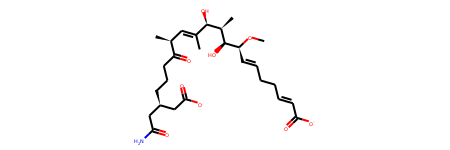

In [23]:
# This molecule doesn't have a Murcko Scaffold (its
df_murcko[df_murcko['scff_generic'] == '']
df_murcko.loc[678, 'mol_rdk']

In [24]:
# How many scaffolds have less than five molecules?
sum(scff_counts > 5)

167

### Visualize Generic Scaffolds against Normal Scaffolds

In [28]:
# Function to get mol from scaffold smiles
fromSmiles = Chem.MolFromSmiles

#### First Example

In [40]:
# Helper function to visualize examples
def _draw_scaffolds(idx):
    labels = ['Original', 'Normal Scff.', 'Generic Scff.']
    original = df_all_mols.loc[idx, 'mol_rdk']
    normal = fromSmiles(df_murcko.loc[idx, 'scff'])
    generic = fromSmiles(df_murcko.loc[idx, 'scff_generic'])
    mols = [original, normal, generic]
    return Chem.Draw.MolsToGridImage(mols=mols, legends=labels)

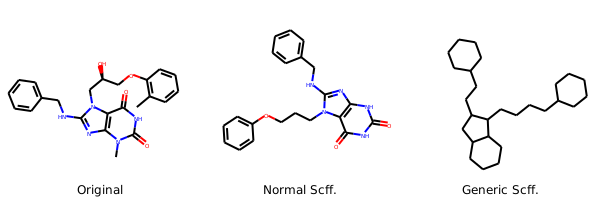

In [41]:
_draw_scaffolds(1759)

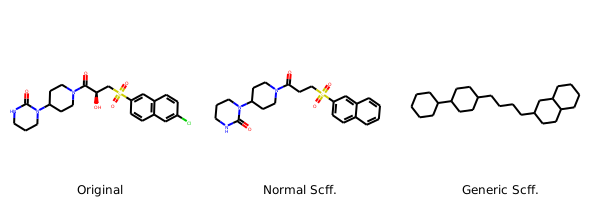

In [43]:
_draw_scaffolds(100)

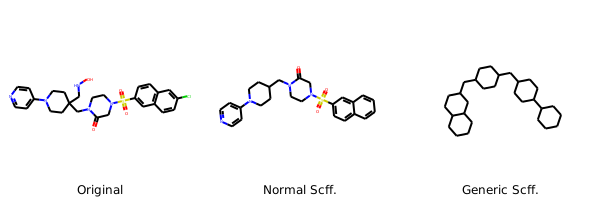

In [45]:
_draw_scaffolds(10)

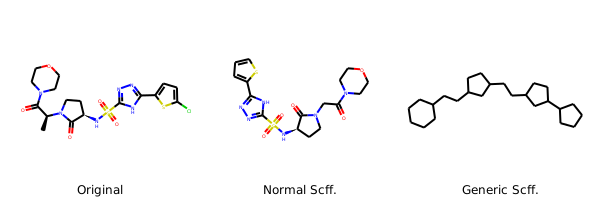

In [47]:
_draw_scaffolds(50)

### Use DeepChem to compute the Scaffold splitting

In [216]:
from deepchem.data import NumpyDataset 
from rdkit import Chem

In [233]:
# As qe can see in https://deepchem.io/docs/_modules/deepchem/splits/splitters.html, https://deepchem.io/deepchem.splits.html
# molecules are required in SMILES format
df_dataset = df_murcko[['scff_generic', 'scff', 'name']].copy()
df_dataset['y'] = [1 if i == 'active' else 0 for i in df_murcko.Activity]
df_dataset['smiles'] = [Chem.MolToSmiles(mol) for mol in df_murcko.mol_rdk]

# Create the deepchem dataset
dataset = NumpyDataset( X = df_dataset.drop('y', axis=1), y = df_dataset['y'], ids=df_dataset['smiles'])
dataset.ids.size


dataset_g = NumpyDataset( X = df_dataset.drop('y', axis=1), y = df_dataset['y'], ids=df_dataset['scff_generic'])

In [234]:
from deepchem.splits.splitters import ScaffoldSplitter

### Split function used by deepchem

```python
def split(self,
            dataset,
            frac_train=.8,
            frac_valid=.1,
            frac_test=.1,
            log_every_n=1000): # Usa la función log para guardar
    """
        Splits internal compounds into train/validation/test by scaffold.
        """
    #** 
    np.testing.assert_almost_equal(frac_train + frac_valid + frac_test, 1.)
    
    #** Crea un diccionario vacío
    scaffolds = {}
    log("About to generate scaffolds", self.verbose)
    data_len = len(dataset)
    
    #** El objeto de la clase Dataset tiene como atributo ids al smiles de la molécula
    for ind, smiles in enumerate(dataset.ids): 
      if ind % log_every_n == 0:
        log("Generating scaffold %d/%d" % (ind, data_len), self.verbose)
        
      # Genera los scaffolds de Murcko
      scaffold = generate_scaffold(smiles) # La función implementa MurckoScaffoldSmiles
        # Con lo cual, no da opción de Scaffolds genéricos, y sólo funciona desde SMILES
        
      #********************
      # La clave para ir llenando los bins está aquí
      #********************
      if scaffold not in scaffolds:
        scaffolds[scaffold] = [ind] # Crea una nueva entrada si el scaffold no ha sido 'visto'
        # El key es el scaffold y el value es una lista con el índice de la primera ocurrencia
      else:
        scaffolds[scaffold].append(ind) # Si el scaffold ya existe, añade el índice de la ocurrencia
        
    # Ordena los índices de las moléculas que pertenecen a cada scaffold
    # Sort from largest to smallest scaffold sets
    scaffolds = {key: sorted(value) for key, value in scaffolds.items()}
    
    # Crea una lista con las listas de los índices de cada scaffold
    # Ordenando por longitud del número de índices en el set, y por el valor del primer índice
    # Cada scaffold_set es una lista de índices que pertenecen a un scaffold en particular
    scaffold_sets = [
        scaffold_set
        for (scaffold, scaffold_set) in sorted(
            scaffolds.items(), key=lambda x: (len(x[1]), x[1][0]), reverse=True)
    ]
    # La longitud del Train set se establece según la longitud del dataset
    train_cutoff = frac_train * len(dataset)
    valid_cutoff = (frac_train + frac_valid) * len(dataset)
    # Se crean las listas vacias de los tres sets
    # Cuando no se requiere el set de validación, se omite estableciendo el frac_valid = 0
    train_inds, valid_inds, test_inds = [], [], []
    log("About to sort in scaffold sets", self.verbose)
    
    # Por cada scaffold_set:
    for scaffold_set in scaffold_sets:
      # Si lo que hay ya en train_inds más el scaffold_set es mayor al cutoff para el train set 
      if len(train_inds) + len(scaffold_set) > train_cutoff:
        # Lo mismo para el valid set
        if len(train_inds) + len(valid_inds) + len(scaffold_set) > valid_cutoff:
          test_inds += scaffold_set
        else:
          valid_inds += scaffold_set
      else:
        train_inds += scaffold_set
        
    return train_inds, valid_inds, test_inds
```

In [235]:
x = ScaffoldSplitter().train_test_split(dataset)
x_g = ScaffoldSplitter().train_test_split(dataset_g)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'k_fold_split',
 'split',
 'train_test_split',
 'train_valid_test_split',
 'verbose']

In [221]:
x[0].get_shape()
np.sum(x[0]._y)
np.sum(x[1]._y)
df_dataset.y.sum()

292

In [239]:
X_train = x[0]
X_test = x[1]
X_train_g = x_g[0]
X_test_g = x_g[1]

X_train = pd.DataFrame(X_train.X)
X_train_g = pd.DataFrame(X_train_g.X)

X_test = pd.DataFrame(X_test.X) 
X_test_g = pd.DataFrame(X_test_g.X)

In [242]:
X_test[2]

0       decoy_829
1       decoy_828
2       decoy_771
3       decoy_759
4       decoy_757
          ...    
1348          XMK
1349          XMJ
1350          XMB
1351          XMA
1352          815
Name: 2, Length: 1353, dtype: object

In [243]:
X_test_g[2]

0       decoy_4499
1       decoy_4498
2       decoy_4496
3       decoy_4494
4       decoy_4481
           ...    
1348           I1H
1349           D91
1350           XMC
1351           XMB
1352           XMA
Name: 2, Length: 1353, dtype: object